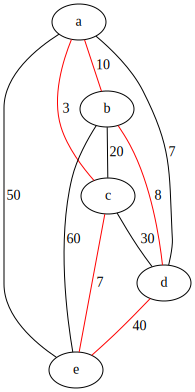

In [67]:
from cProfile import label
from cmath import nan
from curses import init_color
from hashlib import new
from nntplib import ArticleInfo
import networkx as nx
import graphviz
import numpy as np

G = nx.Graph()

nodos_por_recorrer=[]
caminos=[]


matriz=[
    [0, 10,  3,  7, 50],
    [10, 0, 20,  8, 60],
    [3, 20,  0, 30,  7],
    [7,  8, 30,  0, 40],
    [50,60,  7, 40,  0]
];

for i in range(len(matriz)):
    nodos_por_recorrer.append(i)



def tsp(punto=nan,inicio=nan, contador=nan,pisadas=[],por_recorrer=[] ,peso=0):
    pisadas.append(punto)

    if (sorted(pisadas)==sorted(por_recorrer)):
        pisadas.append(inicio)
        newpeso=peso+matriz[punto][inicio]
        pisadas.append(newpeso)
        caminos.append(pisadas)
    
        return;
  
   
    if contador%2==1:
        newcontador=contador+1;
        #incremento en y
        for i in range (len(matriz)):
            if(matriz[punto][i]!=0) and i not in pisadas:
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[punto][i]
                
                tsp(punto=i,inicio=inicio,contador=newcontador,pisadas=newpisadas,por_recorrer=por_recorrer, peso=newpeso);
           
        
    else:
        #incremento en x
        
        newcontador=contador+1;

        for i in range (len(matriz[0])):
            if(matriz[i][punto]!=0)  and i not in pisadas:
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[i][punto]
                tsp (punto=i,inicio=inicio,contador=newcontador,pisadas=newpisadas,por_recorrer=por_recorrer, peso=newpeso);
            

tsp(punto=0,inicio=0,por_recorrer=nodos_por_recorrer,contador=1)

min=float("inf")
minCamino=nan;

for item in caminos:
    if(item[-1]<min):
        min=item[-1]
        minCamino=item;
      
minCamino.pop()


for n in range(len(matriz)):
    G.add_node(chr(97+n))
for n in range(len(matriz)):
    for i in range(len(matriz)):
        if matriz[n][i]!=0:
            if n in minCamino and i in minCamino:
                if (minCamino.index(i) + 1 ==minCamino.index(n)) or (minCamino.index(n) + 1 ==minCamino.index(i)):
                    G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="red")
                else:
                    G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="black")
            else:
        
                G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="black")
                
G.add_edge(chr(minCamino[0]+97), chr(minCamino[-2]+97), label=str(matriz[minCamino[0]][minCamino[-2]]),color="red")
A = nx.nx_agraph.to_agraph(G)
A.layout('dot')

graphviz.Source(A.to_string()) 
